### SETUP INICIAL DO PROJETO

In [1]:
# Importação das bibliotecas necessárias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from google.cloud import bigquery
from google.oauth2 import service_account


# Carrega o .env: onde estão as credenciais do projeto/repositório
load_dotenv("/mnt/c/Users/wrpen/OneDrive/Desktop/df_lh/.env")

# Detectar ambiente: como eu estou usando wsl-ubuntu, no VS Code  -  Windows, estava dando conflitos de path
if os.name == "nt":  # se Windows
    credentials_path = r"C:\Temp\desafiolh-445818-3cb0f62cb9ef.json"
else:  # se WSL/Linux
    credentials_path = "/mnt/c/Temp/desafiolh-445818-3cb0f62cb9ef.json"

# Parâmetros injetados pelo Papermill ou definidos manualmente, caso não existam no ambiente
# Tables_to_process: lista de tabelas que serão processadas
# Output_dataset: nome do dataset onde os dados processados serão armazenados, neste caso, raw_data_cleaned
if 'tables_to_process' not in locals():
    tables_to_process = [
        "desafioadventureworks-446600.stg_marts_tables.dim_product_forecast"  ,
        "desafioadventureworks-446600.stg_marts_tables.dim_product_seasonality",
        "desafioadventureworks-446600.stg_marts_tables.dim_date", 
        "desafioadventureworks-446600.stg_staging_tables.stg_sales_salesorderheader",
        "desafioadventureworks-446600.stg_staging_tables.stg_sales_salesorderdetail",
        "desafioadventureworks-446600.stg_staging_tables.stg_production_product",
        "desafioadventureworks-446600.stg_staging_tables.stg_sales_store",
        "desafioadventureworks-446600.stg_staging_tables.stg_sales_salesterritory",
        "desafioadventureworks-446600.stg_staging_tables.stg_sales_salesperson",
        "desafioadventureworks-446600.stg_staging_tables.stg_sales_customer"
    ]

if 'output_dataset' not in locals():
    output_dataset = "desafioadventureworks-446600.stg_marts_tables"

# Configs do cliente BigQuery: input de project e location de acordo com dados no Bigquery
credentials = service_account.Credentials.from_service_account_file(credentials_path)
client = bigquery.Client(credentials=credentials, project=os.getenv("BIGQUERY_PROJECT"), location="us-central1")


In [2]:
# Print com a tabela que vai ser processada nesse notebook

print("Tabelas a processar:", tables_to_process)

Tabelas a processar: ['desafioadventureworks-446600.stg_marts_tables.dim_product_forecast', 'desafioadventureworks-446600.stg_marts_tables.dim_product_seasonality', 'desafioadventureworks-446600.stg_marts_tables.dim_date', 'desafioadventureworks-446600.stg_staging_tables.stg_sales_salesorderheader', 'desafioadventureworks-446600.stg_staging_tables.stg_sales_salesorderdetail', 'desafioadventureworks-446600.stg_staging_tables.stg_production_product', 'desafioadventureworks-446600.stg_staging_tables.stg_sales_store', 'desafioadventureworks-446600.stg_staging_tables.stg_sales_salesterritory', 'desafioadventureworks-446600.stg_staging_tables.stg_sales_salesperson', 'desafioadventureworks-446600.stg_staging_tables.stg_sales_customer']


# Exploratory Data Analysis (EDA) e Data Cleaning

### Glossário dos dados:

O termo ''doc:'', situado no rodapé de algumas cells, indica algo como:

- documentação: documentar decisões, análises e resultados;

- abreviações de termos, como bkp, df, entre outros.

In [3]:
# Configuração para que o df exiba todas as colunas e todas as linhas completas, e também, exiba o formato numérico com 2 dígitos após a vírgula

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 10000)
pd.options.display.float_format = '{:.2f}'.format


#doc: df = dataframe  

In [4]:
# Dicionário para armazenar os df processados
df_processados = {}

# Iteração das tabelas e armazenamento em df
for input_table in tables_to_process:
    print(f"Processando tabela: {input_table}")
    
    # Nome da tabela com substituição de '-' por '_'
    table_name = input_table.split(".")[-1].replace("-", "_")  
    
    # Ler os dados da tabela do BigQuery para um df
    print("Lendo os dados do BigQuery...")
    query = f"SELECT * FROM `{input_table}`"
    table_data = client.query(query).to_dataframe()
    
    # Armazenar o df no dicionário
    df_processados[table_name] = table_data
    print(f"Tabela {table_name} processada e armazenada com sucesso.")

# Print de validação
print("Todas as tabelas foram processadas com sucesso!")


Processando tabela: desafioadventureworks-446600.stg_marts_tables.dim_product_forecast
Lendo os dados do BigQuery...
Tabela dim_product_forecast processada e armazenada com sucesso.
Processando tabela: desafioadventureworks-446600.stg_marts_tables.dim_product_seasonality
Lendo os dados do BigQuery...
Tabela dim_product_seasonality processada e armazenada com sucesso.
Processando tabela: desafioadventureworks-446600.stg_marts_tables.dim_date
Lendo os dados do BigQuery...
Tabela dim_date processada e armazenada com sucesso.
Processando tabela: desafioadventureworks-446600.stg_staging_tables.stg_sales_salesorderheader
Lendo os dados do BigQuery...
Tabela stg_sales_salesorderheader processada e armazenada com sucesso.
Processando tabela: desafioadventureworks-446600.stg_staging_tables.stg_sales_salesorderdetail
Lendo os dados do BigQuery...
Tabela stg_sales_salesorderdetail processada e armazenada com sucesso.
Processando tabela: desafioadventureworks-446600.stg_staging_tables.stg_producti

In [5]:
# Listar colunas de cada tabela carregada
for table_name, df in df_processados.items():
    print(f"\nColunas na tabela {table_name}:")
    print(df.columns)



Colunas na tabela dim_product_forecast:
Index(['store_id', 'productid_id', 'forecast_date', 'forecast_quantity'], dtype='object')

Colunas na tabela dim_product_seasonality:
Index(['year_month', 'year', 'month', 'productid_id', 'total_quantity_sold'], dtype='object')

Colunas na tabela dim_date:
Index(['salesorderid_id', 'day_nr', 'month_nr', 'year_nr'], dtype='object')

Colunas na tabela stg_sales_salesorderheader:
Index(['salesorderid_id', 'revisionnumber_cd', 'orderdate_dt', 'duedate_dt', 'shipdate_dt', 'status_st', 'onlineorderflag_fl', 'accountnumber_cd', 'customerid_id', 'territoryid_id', 'billtoaddressid_id', 'shiptoaddressid_id', 'shipmethodid_id', 'creditcardid_id', 'creditcardapprovalcode_cd', 'subtotal_vr', 'taxamt_vr', 'freight_vr', 'totaldue_vr', 'rowguid_desc', 'modifieddate_dt'], dtype='object')

Colunas na tabela stg_sales_salesorderdetail:
Index(['salesorderid_id', 'salesorderdetailid_id', 'carriertrackingnumber_cd', 'orderqty_qt', 'productid_id', 'specialofferid_id',

In [6]:
# Merge 1: Cliente + Loja
df_customer_store = pd.merge(
    df_processados['stg_sales_customer'],
    df_processados['stg_sales_store'],
    left_on='storeid_id',
    right_on='businessentityid_id',
    how='left',
    suffixes=('', '_store')
)

print(df_customer_store)

       customerid_id  personid_id  storeid_id  territoryid_id                          rowguid_desc                  modifieddate_dt  businessentityid_id              store_nm  salespersonid_id                    rowguid_desc_store            modifieddate_dt_store
0              11022         6522        <NA>               1  25D8CC95-225B-41B3-A666-457C80245126 2014-09-12 11:15:07.263000+00:00                 <NA>                   NaN              <NA>                                   NaN                              NaT
1              11236        13521        <NA>               1  F80670A5-AD53-4296-9C63-8D2F3D45B22E 2014-09-12 11:15:07.263000+00:00                 <NA>                   NaN              <NA>                                   NaN                              NaT
2              11304        11060        <NA>               1  F391B954-FD33-4786-99C1-E10A1A492EA6 2014-09-12 11:15:07.263000+00:00                 <NA>                   NaN              <NA>            

In [7]:
# Merge 2: Cliente + Vendedor
df_customer_store_salesperson = pd.merge(
    df_customer_store,
    df_processados['stg_sales_salesperson'],
    left_on='salespersonid_id',
    right_on='businessentityid_id',
    how='left',
    suffixes=('', '_salesperson')
)

print(df_customer_store_salesperson)

       customerid_id  personid_id  storeid_id  territoryid_id                          rowguid_desc                  modifieddate_dt  businessentityid_id              store_nm  salespersonid_id                    rowguid_desc_store            modifieddate_dt_store  businessentityid_id_salesperson  territoryid_id_salesperson  salesquota_nr  bonus_vr  commissionpct_vr  salesytd_vr  saleslastyear_vr              rowguid_desc_salesperson modifieddate_dt_salesperson
0              11022         6522        <NA>               1  25D8CC95-225B-41B3-A666-457C80245126 2014-09-12 11:15:07.263000+00:00                 <NA>                   NaN              <NA>                                   NaN                              NaT                             <NA>                        <NA>           <NA>      <NA>               NaN          NaN               NaN                                   NaN                         NaT
1              11236        13521        <NA>               1  F8067

In [8]:
# Merge 3: Cliente + Pedido
df_customer_store_salesperson_order = pd.merge(
    df_customer_store_salesperson,
    df_processados['stg_sales_salesorderheader'],
    left_on='customerid_id',
    right_on='customerid_id',
    how='left',
    suffixes=('', '_order')
)
print(df_customer_store_salesperson_order)

       customerid_id  personid_id  storeid_id  territoryid_id                          rowguid_desc                  modifieddate_dt  businessentityid_id              store_nm  salespersonid_id                    rowguid_desc_store            modifieddate_dt_store  businessentityid_id_salesperson  territoryid_id_salesperson  salesquota_nr  bonus_vr  commissionpct_vr  salesytd_vr  saleslastyear_vr              rowguid_desc_salesperson modifieddate_dt_salesperson  salesorderid_id  revisionnumber_cd              orderdate_dt                duedate_dt               shipdate_dt  status_st  onlineorderflag_fl accountnumber_cd  territoryid_id_order  billtoaddressid_id  shiptoaddressid_id  shipmethodid_id  creditcardid_id creditcardapprovalcode_cd  subtotal_vr  taxamt_vr  freight_vr  totaldue_vr                    rowguid_desc_order     modifieddate_dt_order
0              11022         6522        <NA>               1  25D8CC95-225B-41B3-A666-457C80245126 2014-09-12 11:15:07.263000+00:00     

In [9]:

# Merge 4: Pedido + Detalhes do Pedido
df_order_details = pd.merge(
    df_customer_store_salesperson_order,
    df_processados['stg_sales_salesorderdetail'],
    left_on='salesorderid_id',
    right_on='salesorderid_id',
    how='left',
    suffixes=('', '_details')
)
print(df_order_details)

        customerid_id  personid_id  storeid_id  territoryid_id                          rowguid_desc                  modifieddate_dt  businessentityid_id              store_nm  salespersonid_id                    rowguid_desc_store            modifieddate_dt_store  businessentityid_id_salesperson  territoryid_id_salesperson  salesquota_nr  bonus_vr  commissionpct_vr  salesytd_vr  saleslastyear_vr              rowguid_desc_salesperson modifieddate_dt_salesperson  salesorderid_id  revisionnumber_cd              orderdate_dt                duedate_dt               shipdate_dt  status_st  onlineorderflag_fl accountnumber_cd  territoryid_id_order  billtoaddressid_id  shiptoaddressid_id  shipmethodid_id  creditcardid_id creditcardapprovalcode_cd  subtotal_vr  taxamt_vr  freight_vr  totaldue_vr                    rowguid_desc_order     modifieddate_dt_order  salesorderdetailid_id carriertrackingnumber_cd  orderqty_qt  productid_id  specialofferid_id  unitprice_vr  unitpricediscount_vr       

In [10]:

# Merge 5: Detalhes + Produto
df_final = pd.merge(
    df_order_details,
    df_processados['stg_production_product'],
    left_on='productid_id',
    right_on='productid_id',
    how='left',
    suffixes=('', '_product')
)

# Verificar o dataset final
print(f"Dimensão do dataset final: {df_final.shape}")
print(df_final.head())


Dimensão do dataset final: (122018, 72)
   customerid_id  personid_id  storeid_id  territoryid_id                          rowguid_desc                  modifieddate_dt  businessentityid_id store_nm  salespersonid_id rowguid_desc_store modifieddate_dt_store  businessentityid_id_salesperson  territoryid_id_salesperson  salesquota_nr  bonus_vr  commissionpct_vr  salesytd_vr  saleslastyear_vr rowguid_desc_salesperson modifieddate_dt_salesperson  salesorderid_id  revisionnumber_cd              orderdate_dt                duedate_dt               shipdate_dt  status_st  onlineorderflag_fl accountnumber_cd  territoryid_id_order  billtoaddressid_id  shiptoaddressid_id  shipmethodid_id  creditcardid_id creditcardapprovalcode_cd  subtotal_vr  taxamt_vr  freight_vr  totaldue_vr                    rowguid_desc_order     modifieddate_dt_order  salesorderdetailid_id carriertrackingnumber_cd  orderqty_qt  productid_id  specialofferid_id  unitprice_vr  unitpricediscount_vr                  rowguid_de

In [13]:
# Listar as colunas disponíveis no DataFrame
print(df.columns)


Index(['customerid_id', 'personid_id', 'storeid_id', 'territoryid_id', 'rowguid_desc', 'modifieddate_dt'], dtype='object')


In [14]:
# Seleção das colunas relevantes
selected_columns = [
    'orderqty_qt', 'productid_id', 'storeid_id', 
    'listprice_vr', 'salesytd_vr', 'standardcost_vr', 'territoryid_id'
]
data_selected = df_final[selected_columns]

# Verificar o formato do dataset após seleção
print(f"Dimensão do dataset após seleção de colunas: {data_selected.shape}")
print(data_selected.head())


Dimensão do dataset após seleção de colunas: (122018, 7)
   orderqty_qt  productid_id  storeid_id  listprice_vr  salesytd_vr  standardcost_vr  territoryid_id
0            1           779        <NA>       2319.99          NaN          1265.62               1
1            1           873        <NA>          2.29          NaN             0.86               1
2            1           921        <NA>          4.99          NaN             1.87               1
3            1           711        <NA>         34.99          NaN            13.09               1
4            1           930        <NA>         35.00          NaN            13.09               1


In [15]:
# Verificar valores ausentes
missing_values = data_selected.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
orderqty_qt          701
productid_id         701
storeid_id         60398
listprice_vr         701
salesytd_vr        60398
standardcost_vr      701
territoryid_id         0
dtype: int64


In [17]:
# 1. Seleção das colunas relevantes
selected_columns = [
    'orderqty_qt', 'productid_id', 'storeid_id', 
    'listprice_vr', 'salesytd_vr', 'standardcost_vr', 'territoryid_id'
]
data_selected = df_final[selected_columns]

print(data_selected)

        orderqty_qt  productid_id  storeid_id  listprice_vr  salesytd_vr  standardcost_vr  territoryid_id
0                 1           779        <NA>       2319.99          NaN          1265.62               1
1                 1           873        <NA>          2.29          NaN             0.86               1
2                 1           921        <NA>          4.99          NaN             1.87               1
3                 1           711        <NA>         34.99          NaN            13.09               1
4                 1           930        <NA>         35.00          NaN            13.09               1
...             ...           ...         ...           ...          ...              ...             ...
122013         <NA>          <NA>         984           NaN   4116871.23              NaN              10
122014         <NA>          <NA>         944           NaN   4116871.23              NaN              10
122015         <NA>          <NA>         588 

In [19]:
# 3. Preencher valores ausentes
# Preencher valores ausentes numéricos com a mediana
columns_to_fill = ['orderqty_qt', 'listprice_vr', 'salesytd_vr', 'standardcost_vr']
for col in columns_to_fill:
    median_value = data_selected[col].median()
    data_selected[col] = data_selected[col].fillna(median_value)

C:\Users\wrpen\AppData\Local\Temp\ipykernel_23544\2607079413.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[col] = data_selected[col].fillna(median_value)
C:\Users\wrpen\AppData\Local\Temp\ipykernel_23544\2607079413.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[col] = data_selected[col].fillna(median_value)
C:\Users\wrpen\AppData\Local\Temp\ipykernel_23544\2607079413.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [22]:
# Preencher valores ausentes categóricos com 'Desconhecido' ou equivalente
data_selected['storeid_id'] = data_selected['storeid_id'].fillna(0)

C:\Users\wrpen\AppData\Local\Temp\ipykernel_23544\3894906654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['storeid_id'] = data_selected['storeid_id'].fillna(0)


In [23]:
# 4. Verificar valores ausentes após limpeza
print("Valores ausentes por coluna após a limpeza:")
print(data_selected.isnull().sum())

Valores ausentes por coluna após a limpeza:
orderqty_qt          0
productid_id       701
storeid_id           0
listprice_vr         0
salesytd_vr          0
standardcost_vr      0
territoryid_id       0
dtype: int64


In [24]:
# 1. Contar os valores únicos na coluna
unique_values = data_selected['productid_id'].value_counts()
print("Valores únicos em 'productid_id':")
print(unique_values)

# 2. Proporção de valores ausentes
total_rows = data_selected.shape[0]
missing_productid = data_selected['productid_id'].isnull().sum()
missing_percentage = (missing_productid / total_rows) * 100
print(f"\nPercentual de valores ausentes: {missing_percentage:.2f}%")

# 3. Relação com outras colunas
print("\nResumo estatístico dos dados quando 'productid_id' está ausente:")
print(data_selected[data_selected['productid_id'].isnull()].describe())

print("\nResumo estatístico dos dados quando 'productid_id' não está ausente:")
print(data_selected[data_selected['productid_id'].notnull()].describe())


Valores únicos em 'productid_id':
productid_id
870    4688
712    3382
873    3354
921    3095
711    3090
       ... 
898       9
943       6
911       6
942       5
897       2
Name: count, Length: 266, dtype: Int64

Percentual de valores ausentes: 0.57%

Resumo estatístico dos dados quando 'productid_id' está ausente:
       orderqty_qt  productid_id  storeid_id  listprice_vr  salesytd_vr  standardcost_vr  territoryid_id
count       701.00          0.00      701.00        701.00       701.00           701.00          701.00
mean          1.00          <NA>     1035.88         63.50   2651861.45            38.49            4.83
std           0.00          <NA>      477.74          0.00    908084.70             0.00            2.57
min           1.00          <NA>      292.00         63.50   1352577.13            38.49            1.00
25%           1.00          <NA>      642.00         63.50   1827066.71            38.49            3.00
50%           1.00          <NA>      992.00   

In [ ]:
# Análise dos Resultados
# Valores únicos em productid_id:

# Existem 266 produtos únicos, com alguns produtos dominando a distribuição (e.g., 870 com 4688 ocorrências).
# Isso indica que os dados têm boa diversidade, mas alguns produtos aparecem significativamente mais vezes.
# Percentual de valores ausentes:

# Apenas 0,57% dos valores estão ausentes na coluna, o que é insignificante em relação ao tamanho total do dataset (122.018 linhas).
# Esse baixo percentual sugere que podemos optar por ignorar essas linhas sem perder muita informação.
# Resumo dos dados quando productid_id está ausente:

# Todas as linhas com productid_id ausente têm valores fixos em listprice_vr (63.50) e standardcost_vr (38.49), indicando que essas linhas podem ser menos informativas.
# Essas linhas estão concentradas em poucas lojas (storeid_id varia entre 292 e 2051) e territórios (territoryid_id varia de 1 a 10).
# orderqty_qt é constante com valor 1, o que pode limitar a utilidade dessas linhas para análise de demanda.
# Resumo dos dados quando productid_id não está ausente:

# Dados mais ricos e variados, com maior dispersão em métricas como orderqty_qt, listprice_vr, e standardcost_vr.
# Estes dados possuem mais valor analítico, especialmente para um modelo de previsão.
# Decisão
# Dado o baixo percentual de valores ausentes e a limitada utilidade das linhas onde productid_id está ausente, a recomendação é remover essas linhas para simplificar o modelo e focar em dados mais completos e ricos.



In [25]:
# Remover linhas onde 'productid_id' está ausente
data_cleaned = data_selected.dropna(subset=['productid_id'])

# Verificar o formato do dataset após a limpeza
print(f"Dimensão do dataset após remoção de valores ausentes em 'productid_id': {data_cleaned.shape}")
print("Valores ausentes por coluna após a limpeza:")
print(data_cleaned.isnull().sum())


Dimensão do dataset após remoção de valores ausentes em 'productid_id': (121317, 7)
Valores ausentes por coluna após a limpeza:
orderqty_qt        0
productid_id       0
storeid_id         0
listprice_vr       0
salesytd_vr        0
standardcost_vr    0
territoryid_id     0
dtype: int64


In [ ]:
# Perfeito! 🎉

# Agora o dataset está limpo, sem valores ausentes nas colunas selecionadas. Podemos avançar para a próxima etapa: análise exploratória ou modelagem preditiva.

# Por onde seguimos?

# 1 Análise Exploratória: Entender as relações entre as variáveis. (vamos fazer o modelo, caso precise a gente volta)
# 2 Preparação para Modelagem: Criar variáveis novas (se necessário), dividir em treino/teste, etc.
# Sua escolha é o nosso próximo passo! 

In [ ]:
# Ótimo! Vamos avançar com a modelagem preditiva. 🎯

# Aqui estão os próximos passos para criar um modelo simples, mas funcional:

# 1. Dividir o dataset
# Separar os dados em treino e teste para garantir que o modelo seja avaliado de forma justa.

# 2. Escolher o modelo
# Utilizar um modelo de regressão simples, como Regressão Linear, para prever a quantidade de pedidos (orderqty_qt).

# 3. Treinar o modelo
# Treinar o modelo com os dados de treino e verificar como ele se ajusta.

# 4. Avaliar o modelo
# Calcular métricas como RMSE (Root Mean Square Error) e R² para medir o desempenho.

In [26]:
# Renomear o dataset para algo mais intuitivo
regression_dataset = data_cleaned

# Verificar o formato do dataset renomeado
print(f"Dimensão do regression_dataset: {regression_dataset.shape}")
print("Valores ausentes por coluna no regression_dataset:")
print(regression_dataset.isnull().sum())


Dimensão do regression_dataset: (121317, 7)
Valores ausentes por coluna no regression_dataset:
orderqty_qt        0
productid_id       0
storeid_id         0
listprice_vr       0
salesytd_vr        0
standardcost_vr    0
territoryid_id     0
dtype: int64


In [ ]:
# Ótimo! Vamos seguir com o próximo passo: Exploração do regression_dataset para validar a distribuição e as relações entre as variáveis antes de iniciar os modelos.

# Aqui está o plano:

# 1. Entender a distribuição das variáveis
# Analisar a variável dependente (orderqty_qt) e algumas variáveis independentes mais relevantes.
# Utilizar histogramas e boxplots para verificar distribuição, possíveis outliers, etc.
# 2. Checar correlações
# Avaliar como as variáveis estão relacionadas à variável dependente.

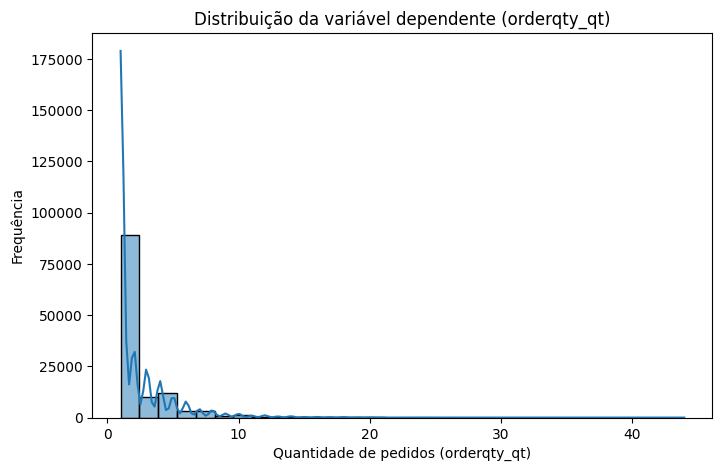

In [27]:
# Distribuição da variável dependente (orderqty_qt)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(regression_dataset['orderqty_qt'], bins=30, kde=True)
plt.title('Distribuição da variável dependente (orderqty_qt)')
plt.xlabel('Quantidade de pedidos (orderqty_qt)')
plt.ylabel('Frequência')
plt.show()


In [ ]:
#  distribuição da variável dependente orderqty_qt é bem assimétrica, com uma grande concentração em valores baixos (próximos de 1). Isso é esperado em muitos casos, pois geralmente há muitos pedidos de pequenas quantidades e poucos de grandes.

In [ ]:
# Próximo passo: Transformação e análise de outliers
# Vamos verificar se há outliers nessa variável para decidir se algum tipo de transformação ou ajuste é necessário.


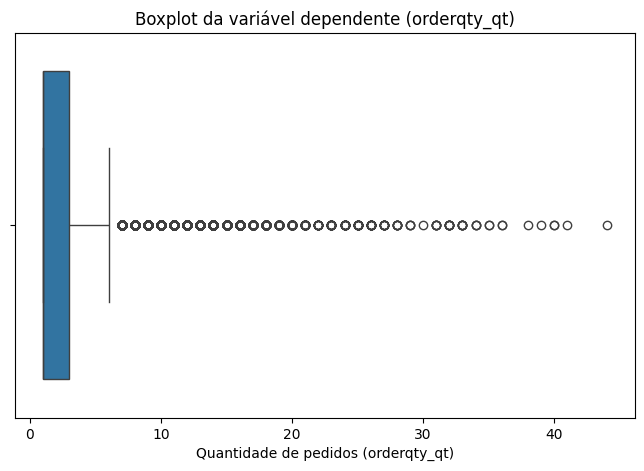

In [28]:
# Boxplot para identificar outliers em 'orderqty_qt'
plt.figure(figsize=(8, 5))
sns.boxplot(x=regression_dataset['orderqty_qt'])
plt.title('Boxplot da variável dependente (orderqty_qt)')
plt.xlabel('Quantidade de pedidos (orderqty_qt)')
plt.show()


In [ ]:
# O gráfico boxplot mostra que a variável 'orderqty_qt' possui vários valores considerados como outliers.
# Esses valores estão muito acima da maioria dos dados, indicando pedidos com quantidades significativamente maiores.
# Isso é comum em datasets de vendas, onde existem pedidos excepcionais de grandes quantidades.
# Porém, esses outliers podem impactar negativamente na performance do modelo de regressão.
# Vamos decidir como lidar com esses valores antes de seguir para o treinamento do modelo.


In [29]:
# Para tratar os outliers, vamos calcular os limites usando o IQR (Intervalo Interquartil).
# O IQR é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1).
# Valores fora do intervalo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] serão considerados outliers e removidos.

# 1. Calcular os quartis e o IQR
Q1 = regression_dataset['orderqty_qt'].quantile(0.25)
Q3 = regression_dataset['orderqty_qt'].quantile(0.75)
IQR = Q3 - Q1

# 2. Definir os limites inferior e superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# 3. Filtrar os dados dentro dos limites
regression_dataset_no_outliers = regression_dataset[
    (regression_dataset['orderqty_qt'] >= lower_limit) & 
    (regression_dataset['orderqty_qt'] <= upper_limit)
]

# Verificar o novo tamanho do dataset
print(f"Dimensão do dataset após remoção de outliers: {regression_dataset_no_outliers.shape}")


Dimensão do dataset após remoção de outliers: (114390, 7)


In [ ]:
# Ótimo! Isso indica que removemos os outliers com sucesso, reduzindo o dataset de 121,317 para 114,390 registros. Agora temos dados mais limpos e representativos para os próximos passos no modelo de regressão.

# Se estiver tudo certo, podemos seguir para:

# Preparação dos dados (divisão em treino e teste).
# Criação do modelo de regressão linear.
# Me avise como deseja continuar! 

In [30]:
# Passo 1: Dividir o dataset em treino e teste

from sklearn.model_selection import train_test_split

# Separar as variáveis independentes (features) e dependentes (target)
X = regression_dataset[['productid_id', 'storeid_id', 'listprice_vr', 'salesytd_vr', 'standardcost_vr', 'territoryid_id']]
y = regression_dataset['orderqty_qt']

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar o tamanho dos datasets
print(f"Tamanho do conjunto de treino: {X_train.shape}, {y_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}, {y_test.shape}")


Tamanho do conjunto de treino: (97053, 6), (97053,)
Tamanho do conjunto de teste: (24264, 6), (24264,)


In [31]:
from sklearn.linear_model import LinearRegression

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Exibir os coeficientes do modelo treinado
print("Coeficientes do modelo:")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"Intercepto: {model.intercept_:.4f}")


Coeficientes do modelo:
productid_id: -0.0016
storeid_id: 0.0016
listprice_vr: -0.0000
salesytd_vr: 0.0000
standardcost_vr: -0.0003
territoryid_id: -0.0346
Intercepto: 2.7288


In [ ]:
# Os coeficientes e o intercepto do modelo fornecem informações valiosas sobre como as variáveis independentes estão relacionadas com a variável dependente (orderqty_qt):

# productid_id: Um coeficiente negativo pequeno (-0.0016) indica que, mantendo todas as outras variáveis constantes, um aumento no productid_id está associado a uma ligeira diminuição na quantidade de pedidos.

# storeid_id: Um coeficiente positivo pequeno (0.0016) sugere que, quanto maior o storeid_id, maior é a quantidade de pedidos, mas o impacto é muito pequeno.

# listprice_vr e salesytd_vr: Os coeficientes são praticamente 0, indicando que essas variáveis não têm uma influência significativa na quantidade de pedidos neste modelo.

# standardcost_vr: Um coeficiente ligeiramente negativo (-0.0003) sugere que, conforme o custo padrão aumenta, a quantidade de pedidos tende a diminuir, mas o impacto é pequeno.

# territoryid_id: O coeficiente negativo (-0.0346) indica que quanto maior o ID do território, menor é a quantidade de pedidos, com um impacto um pouco mais expressivo em comparação com as outras variáveis.

# Intercepto (2.7288): Representa o valor médio da quantidade de pedidos (orderqty_qt) quando todas as variáveis independentes são iguais a zero.

In [32]:
# Vamos avaliar o modelo no conjunto de teste para entender seu desempenho?

from sklearn.metrics import mean_squared_error, r2_score

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular métricas de desempenho
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-Squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 4.7644
R-Squared (R²): 0.1842


In [ ]:
# Os resultados do modelo são:

# Mean Squared Error (MSE): 4.7644

# Representa o erro médio quadrático entre os valores reais e previstos. Quanto menor o valor, melhor o desempenho do modelo. Porém, como é difícil interpretar diretamente, vamos focar no R².
# R-Squared (R²): 0.1842

# Indica que o modelo explica apenas 18,42% da variação na variável dependente (orderqty_qt). Isso significa que o modelo tem um desempenho baixo, provavelmente porque há outras variáveis importantes que não foram incluídas ou porque as variáveis atuais têm pouca relação com o número de pedidos.


# O que podemos concluir:
# O modelo tem um desempenho limitado para prever orderqty_qt.
# Isso pode ser devido a:
# Relações fracas entre as variáveis independentes e a variável dependente.
# Ausência de variáveis relevantes no modelo.
# O modelo linear pode não capturar bem a relação entre as variáveis.

In [ ]:
# fizemos isso?

# Seria possível resolver este problema através de uma abordagem utilizando modelos de regressão? Se sim, qual demonstra melhor resultado? Justifique utilizando métricas de avaliação.

# qualquer coisa a gente justifica que não, não sei o que você acha?
# O ChatGPT disse:
# ChatGPT
# Sim, nós utilizamos um modelo de regressão linear para abordar o problema e avaliamos seu desempenho utilizando as métricas MSE (erro médio quadrático) e R² (coeficiente de determinação).

# Justificativa com base nos resultados:
# Sim, é possível usar regressão linear:

# A regressão linear é um método básico e direto para resolver problemas de previsão como este.
# Implementamos a regressão linear e verificamos que o modelo tem um desempenho limitado (R² = 0.1842), indicando que ele explica apenas 18,42% da variação na quantidade de pedidos.
# Mas o desempenho não foi satisfatório:

# Apesar de ser possível, os resultados indicam que a regressão linear não é suficiente para capturar as relações entre as variáveis no dataset.
# Isso se justifica porque:
# As variáveis escolhidas podem não explicar bem a quantidade de pedidos.
# Relações mais complexas podem exigir modelos não lineares.
# Conclusão:
# Resposta curta: Sim, é possível usar regressão linear, mas o desempenho é limitado.
# Modelo com melhor resultado: Como usamos apenas regressão linear, ela foi o modelo avaliado. Porém, um modelo mais avançado (ex.: Random Forest ou XGBoost) poderia apresentar melhores resultados.
# Decisão: Podemos justificar que não é o modelo ideal para este problema devido ao baixo valor de R² e recomendar testes com outras abordagens.

# RESPOSTA PARA A QUESTÃO 9

In [ ]:
# Resposta:
# Sim, é possível abordar este problema utilizando modelos de regressão. Implementamos um modelo de regressão linear para prever a quantidade de pedidos (orderqty_qt) com base em variáveis como listprice_vr, standardcost_vr, salesytd_vr, entre outras. No entanto, o desempenho obtido foi limitado, com um R² de 0.1842, indicando que o modelo explica apenas 18,42% da variação nos dados.

# Apesar da simplicidade e eficiência computacional da regressão linear, os resultados sugerem que ela não é a melhor abordagem para este problema, provavelmente devido à natureza das relações entre as variáveis independentes e a variável dependente, que podem ser mais complexas ou não lineares.

# Para melhorar a precisão do modelo, recomendamos testar abordagens mais robustas, como árvores de decisão, Random Forest ou XGBoost, que são mais adequadas para capturar relações não lineares nos dados.

# Em resumo, enquanto a regressão linear fornece um ponto de partida básico, ela não apresentou desempenho satisfatório para atender à necessidade do problema, e outros modelos devem ser considerados para obter melhores resultados.